In [27]:
import pandas as pd



In [2]:
import os
#Enable copy-on-write mode for pandas options
pd.options.mode.copy_on_write = True

In [3]:
#Concatenate all CSV files into a single DataFrame
files = [file for file in os.listdir("E:\DATA_ANALYSIS\Pandas\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("E:/DATA_ANALYSIS/Pandas/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)    
    

In [4]:
#Read the combined data into a DataFrame
all_data = pd.read_csv("all_data.csv")
all_data.head(520)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
515,177051,Wired Headphones,2,11.99,04/07/19 08:41,"777 Adams St, Boston, MA 02215"
516,177052,USB-C Charging Cable,2,11.95,04/02/19 09:30,"532 Walnut St, San Francisco, CA 94016"
517,177053,Wired Headphones,1,11.99,04/24/19 20:45,"5 Adams St, Boston, MA 02215"
518,177054,Apple Airpods Headphones,1,150,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301"


In [5]:
### Read in updated dataframe

In [6]:
#Drop rows with missing values to create a clean dataset
all_data_clean = all_data.dropna()
#Extract the month from the 'Order Date' column and create a new 'Month' column
all_data_clean['Month'] = all_data_clean['Order Date'].str.split('/').str[0]
all_data_clean

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [7]:
#Remove duplicate columns in the cleaned dataset
all_data_cleanest = all_data_clean.loc[:, ~all_data_clean.columns.duplicated()]
# Identify and print rows with missing values in the 'Quantity Ordered' column
invalid_rows = all_data_cleanest[all_data_cleanest['Quantity Ordered'].isna()]
print(invalid_rows)

Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address, Month]
Index: []


In [8]:
#Remove rows where 'Month' is 'Or' in the cleaned dataset
all_data_cleanest = all_data_cleanest[all_data_cleanest['Month'] != 'Or']

In [10]:
#Convert relevant columns to numeric and handle errors
all_data_cleanest['Quantity Ordered'] = pd.to_numeric(all_data_cleanest['Quantity Ordered'], errors='coerce')
all_data_cleanest['Quantity Ordered'] = all_data_cleanest['Quantity Ordered'].astype('Int32', errors='ignore')
all_data_cleanest['Month'] = pd.to_numeric(all_data_cleanest['Month'], errors='coerce')
all_data_cleanest['Month'] = all_data_cleanest['Month'].astype('Int32', errors='ignore')
all_data_cleanest['Price Each'] = pd.to_numeric(all_data_cleanest['Price Each'], errors='coerce')
all_data_cleanest['Price Each'] = all_data_cleanest['Price Each'].astype('Int32', errors='ignore')
#Create a new column 'Sale' by multiplying 'Quantity Ordered' and 'Price Each'
all_data_cleanest['Sale'] = all_data_cleanest['Quantity Ordered'] * all_data_cleanest['Price Each']

In [11]:
#Group data by 'Month' and calculate total sales
results = all_data_cleanest.groupby('Month')['Sale'].sum().reset_index()
results['Sale'] = results['Sale'].astype('int32') 
results

,Month,Sale
0,1,1822256
1,2,2202022
2,3,2807100
3,4,3390670
4,5,3152606
5,6,2577802
6,7,2647775
7,8,2244467
8,9,2097560
9,10,3736726


In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
all_data_cleanest = all_data_cleanest.dropna()

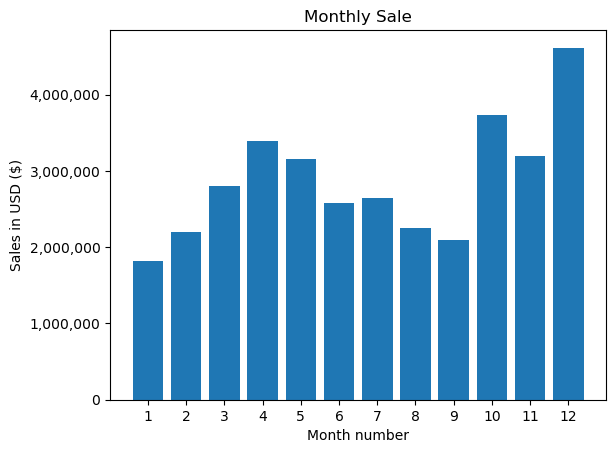

In [13]:
#Plot a bar chart to visualize monthly sales
months = range(1,13)
plt.bar(results['Month'], results['Sale'])

plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.title('Monthly Sale')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

### What city had the highest number of sales

In [14]:
#Define functions to extract city and state from the 'Purchase Address' column
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
#Create a new 'City' column by applying the functions to the 'Purchase Address' column
all_data_cleanest['City'] = all_data_cleanest['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

In [15]:
results_city = all_data_cleanest.groupby('City')['Sale'].sum().reset_index()
results_city

,City,Sale
0,Atlanta (GA),2795498.58
1,Austin (TX),1819581.75
2,Boston (MA),3661642.01
3,Dallas (TX),2767975.4
4,Los Angeles (CA),5452570.8
5,New York City (NY),4664317.43
6,Portland (ME),449758.27
7,Portland (OR),1870732.34
8,San Francisco (CA),8262203.91
9,Seattle (WA),2747755.48


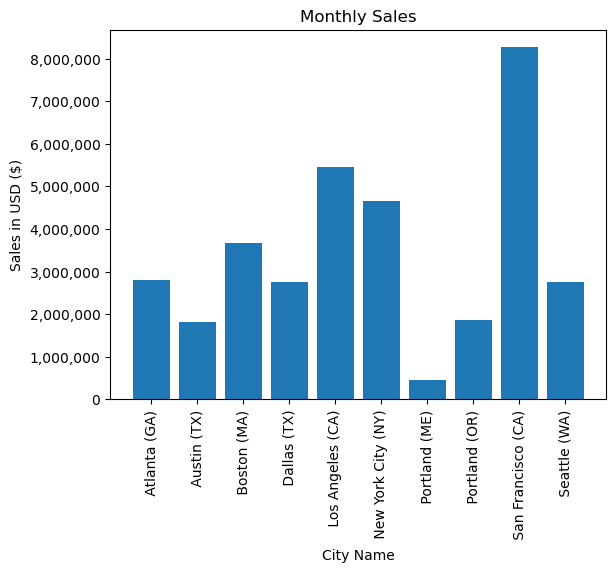

In [16]:
#Plot a bar chart for monthly sales by city
plt.bar(results_city['City'], results_city['Sale'])

plt.ylabel('Sales in USD ($)')
plt.xticks(results_city['City'], rotation = 'vertical')
plt.xlabel('City Name')
plt.title('Monthly Sales')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [29]:
#Convert 'Order Date' to datetime format
all_data_cleanest['Order Date'] = pd.to_datetime(all_data_cleanest['Order Date'], format='%Y-%m-%d %H:%M:%S') 
#Extract hour and minute from 'Order Date'
all_data_cleanest['Hour'] = all_data_cleanest['Order Date'].dt.hour
all_data_cleanest['Minute'] = all_data_cleanest['Order Date'].dt.minute
all_data_cleanest

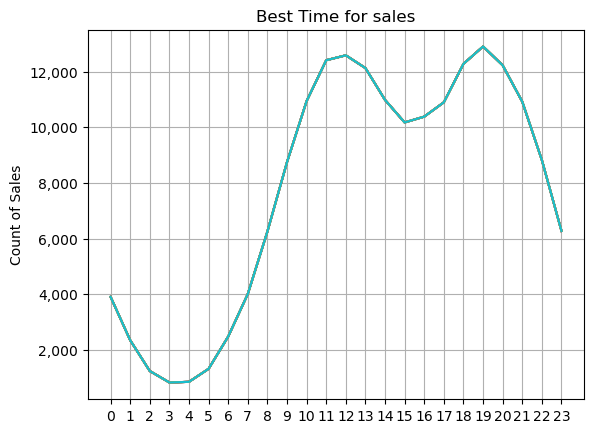

In [21]:
#Create a list of hours and plot the count of sales for each hour
hours = [hour for hour, df in all_data_cleanest.groupby('Hour')]

plt.plot(hours, all_data_cleanest.groupby(['Hour']).count())

plt.ylabel('Count of Sales')
plt.xticks(hours)

plt.title('Best Time for sales')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid()
plt.show()

In [22]:
#Identify duplicated Order IDs and create a new DataFrame with grouped products for each Order ID
df = all_data_cleanest[all_data_cleanest['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))
#Select relevant columns and drop duplicate rows
df = df[['Order ID', 'Grouped']].drop_duplicates()
df

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [23]:
from itertools import combinations
from collections import Counter
#Count combinations of two products in the grouped column
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
count.most_common(10)    

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

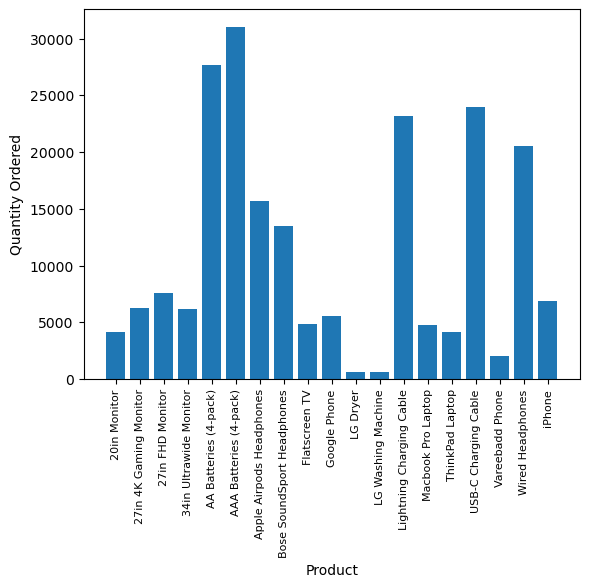

In [24]:
#Group products by quantity ordered
product_group = all_data_cleanest[['Product','Quantity Ordered']].groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products =[product for product, df in product_group]
#Plot a bar chart of quantity ordered for each product
plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()


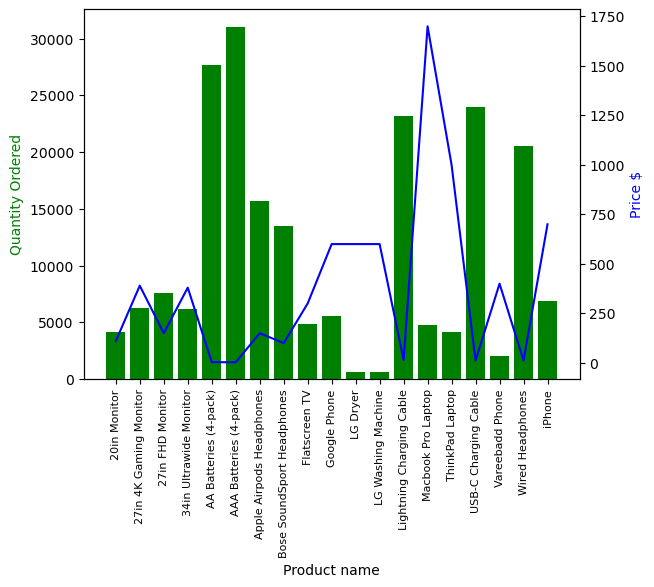

In [33]:
# Convert 'Price Each' to numeric, handling errors with coerce to convert non-numeric values to NaN
all_data_cleanest['Price Each'] = pd.to_numeric(all_data_cleanest['Price Each'], errors='coerce')

# Group by 'Product' and calculate the mean of 'Price Each'
prices = all_data_cleanest.groupby('Product')['Price Each'].mean()

# Print the resulting Series with mean prices
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price $', color='b')
ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()